In [56]:
import pandas
import datetime

In [57]:
frame = pandas.read_csv('../dataset/korea_dataset/patient.csv')

In [58]:
deceased_frame = frame.dropna(subset=['deceased_date'])

In [59]:
deceased_age = (2020 - deceased_frame.birth_year).values

In [62]:
entire_ages = (2020 - frame.birth_year).values
entire_ages = numpy.nan_to_num(entire_ages, nan=-50)
entire_ages = entire_ages[entire_ages>0]

In [63]:
dead_hist = numpy.histogram(deceased_age, bins=numpy.arange(0,100,10))
all_hist = numpy.histogram(numpy.nan_to_num(entire_ages, nan=-50), bins=numpy.arange(0,100,10))
mortality = dead_hist[0]/all_hist[0]

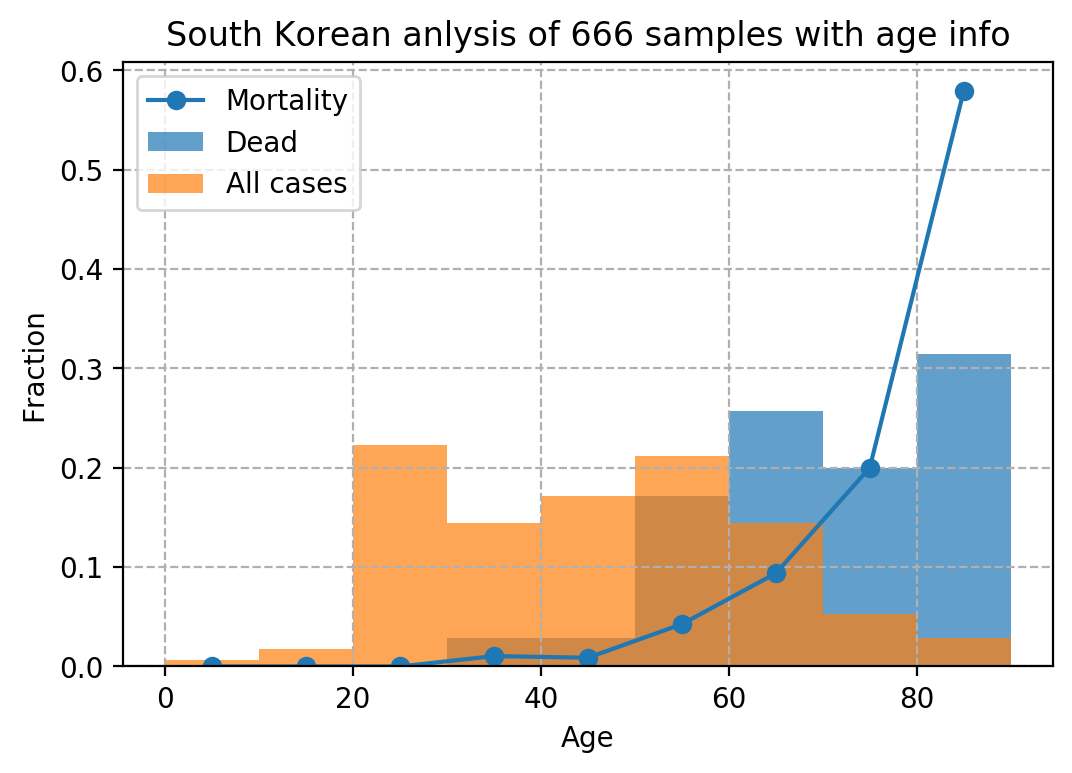

In [84]:
plt.figure(dpi=200)
plt.bar(numpy.arange(0,100,10)[:9]+5, dead_hist[0]/numpy.sum(dead_hist[0]), width=10, alpha=0.7, label='Dead')
plt.bar(numpy.arange(0,100,10)[:9]+5, all_hist[0]/numpy.sum(all_hist[0]), width=10, alpha=0.7, label='All cases');
plt.plot(numpy.arange(0,100,10)[:9]+5, dead_hist[0]/all_hist[0], 'o-', label='Mortality')
plt.legend()
plt.grid(ls='--')
plt.ylabel('Fraction')
plt.xlabel('Age')
plt.title('South Korean anlysis of 666 samples with age info')
plt.savefig('../plots/South-Korea-distribution.pdf')

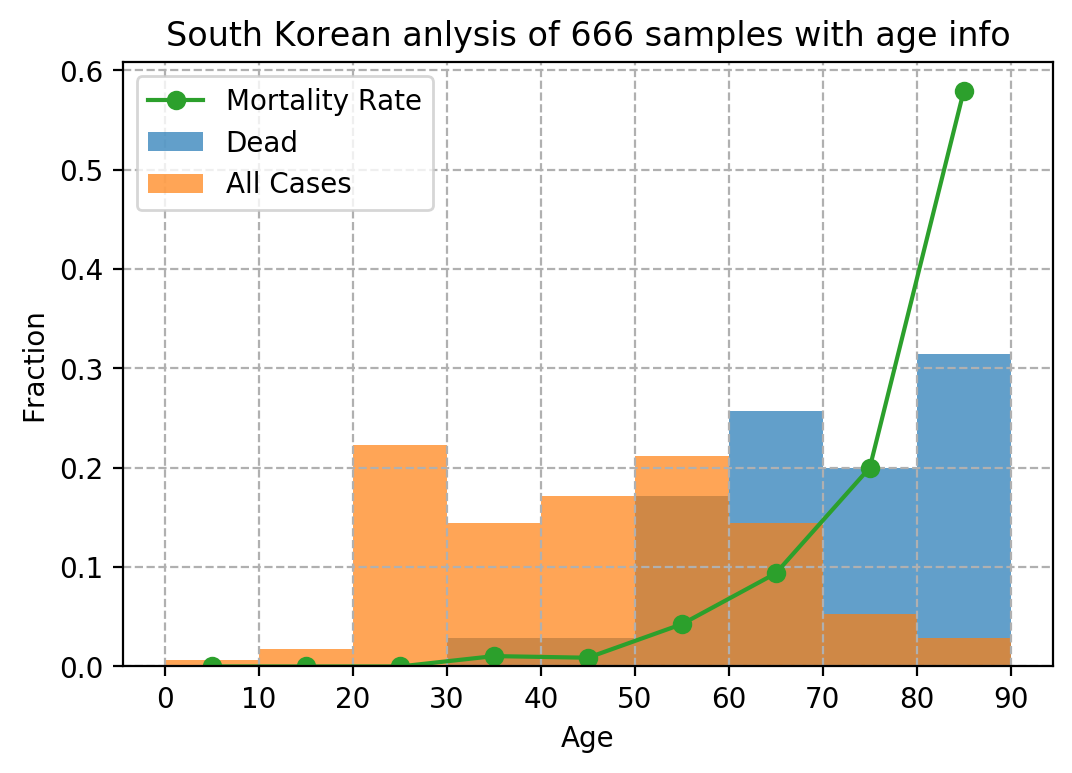

In [61]:
plt.figure(dpi=200)
plt.bar(, bins=numpy.arange(0,100,10)/10, alpha=0.7, density=True, label='Dead');
plt.hist(entire_ages/10, bins=numpy.arange(0,100,10)/10, alpha=0.7, density=True, label='All Cases');
plt.plot(numpy.arange(0,100,10)[:9]/10 + 0.5, mortality, 'o-', label='Mortality Rate')
plt.xticks(numpy.arange(0,100,10)/10, labels=numpy.arange(0,100,10))
plt.legend()
plt.grid(ls='--')
plt.ylabel('Fraction')
plt.xlabel('Age')
plt.title('South Korean anlysis of 666 samples with age info')
plt.savefig('../plots/South-Korea-distribution.pdf')

In [85]:
timeage = pandas.read_csv('https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Time/TimeAge.csv')

In [86]:
timeage

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
130,2020-03-16,0,40s,1147,1
131,2020-03-16,0,50s,1585,6
132,2020-03-16,0,60s,1024,14
133,2020-03-16,0,70s,531,28


In [89]:
timeage.groupby('age').sum()

,time,confirmed,deceased
age,,,
0s,0,903,0
10s,0,5137,0
20s,0,30079,0
30s,0,11085,15
40s,0,14544,15
50s,0,19818,81
60s,0,12740,170
70s,0,6046,275
80s,0,2943,217
